In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('..\Initial_data\K5T2_1\K5T2_1_cor.csv', ";")
df

,K5PS14_1.PV,K5PS14_2.PV,K5L1_1.PV,K5L1_2.PV,K5L1_3.PV,K5L1_4.PV,K5P5_1.PV,K5P5_2.PV,K5BSB_1.PV,K5BSB_2.PV,...,K5T2_1.PV,K5T2_2.PV,K0P102_1.PV,K0T104_2.PV,K5F6X.PV,K5T16.PV,K5T15.PV,K5P8.PV,K5T17.PV,K5L2.PV
0,4.062769,4.189256,12.694500,4.173750,1.531687,312.2457,-40.84609,-40.91484,38.29781,56.14094,...,415.4250,411.5475,4.083094,299.9644,23.11976,96.41875,105.6637,3.909131,120.1669,287.1993
1,4.064288,4.190306,12.363750,4.173750,1.090688,312.2536,-39.48359,-38.33828,38.86625,57.16969,...,415.4287,411.6131,4.083825,300.1200,23.12994,96.38875,105.6425,3.906994,120.1444,288.1738
2,4.065131,4.191300,12.375560,4.232812,1.289531,312.2162,-39.93906,-40.55938,38.43406,55.34781,...,415.4962,411.6825,4.083675,300.1819,23.10081,96.38563,105.6225,3.907106,120.1331,289.1109
3,4.065431,4.192444,13.810780,4.681688,2.695219,312.2260,-40.66797,-40.74062,38.63844,54.76594,...,415.5544,411.7406,4.085644,299.7844,23.26792,96.36875,105.6350,3.910763,120.1144,288.5656
4,4.066875,4.192631,13.858030,5.067563,2.718844,312.2950,-40.02266,-39.07109,37.64219,56.70219,...,415.5994,411.7744,4.085025,299.6269,23.20289,96.35750,105.6550,3.908663,120.0931,289.0479
5,4.065413,4.191056,13.562720,4.301719,1.413563,312.3560,-38.33125,-38.66094,38.32625,57.14094,...,415.6444,411.8044,4.083431,299.3644,23.24586,96.37563,105.6475,3.907031,120.0694,288.8196
6,4.064756,4.190025,12.964220,4.941563,1.929375,312.3264,-40.11406,-40.21016,38.61188,57.39000,...,415.6856,411.8662,4.082475,299.5162,23.24953,96.37688,105.6212,3.906881,120.0569,287.7486
7,4.064250,4.189669,12.227910,4.075313,1.884094,312.3363,-38.40781,-40.42500,38.53531,56.82312,...,415.7025,411.8719,4.082156,300.3937,23.24504,96.33125,105.6125,3.906675,120.0531,287.9789
8,4.062975,4.188431,12.192470,4.467094,1.358438,312.3560,-39.92109,-40.15781,38.28812,57.45594,...,415.7269,411.9188,4.080225,301.3069,23.26044,96.34750,105.5788,3.907875,120.0725,286.6756
9,4.062975,4.188356,12.554720,4.118625,2.077031,312.2930,-40.55469,-40.25312,38.62687,55.69938,...,415.7250,411.9375,4.079775,302.8012,23.27562,96.33375,105.6250,3.909375,120.0581,288.8314


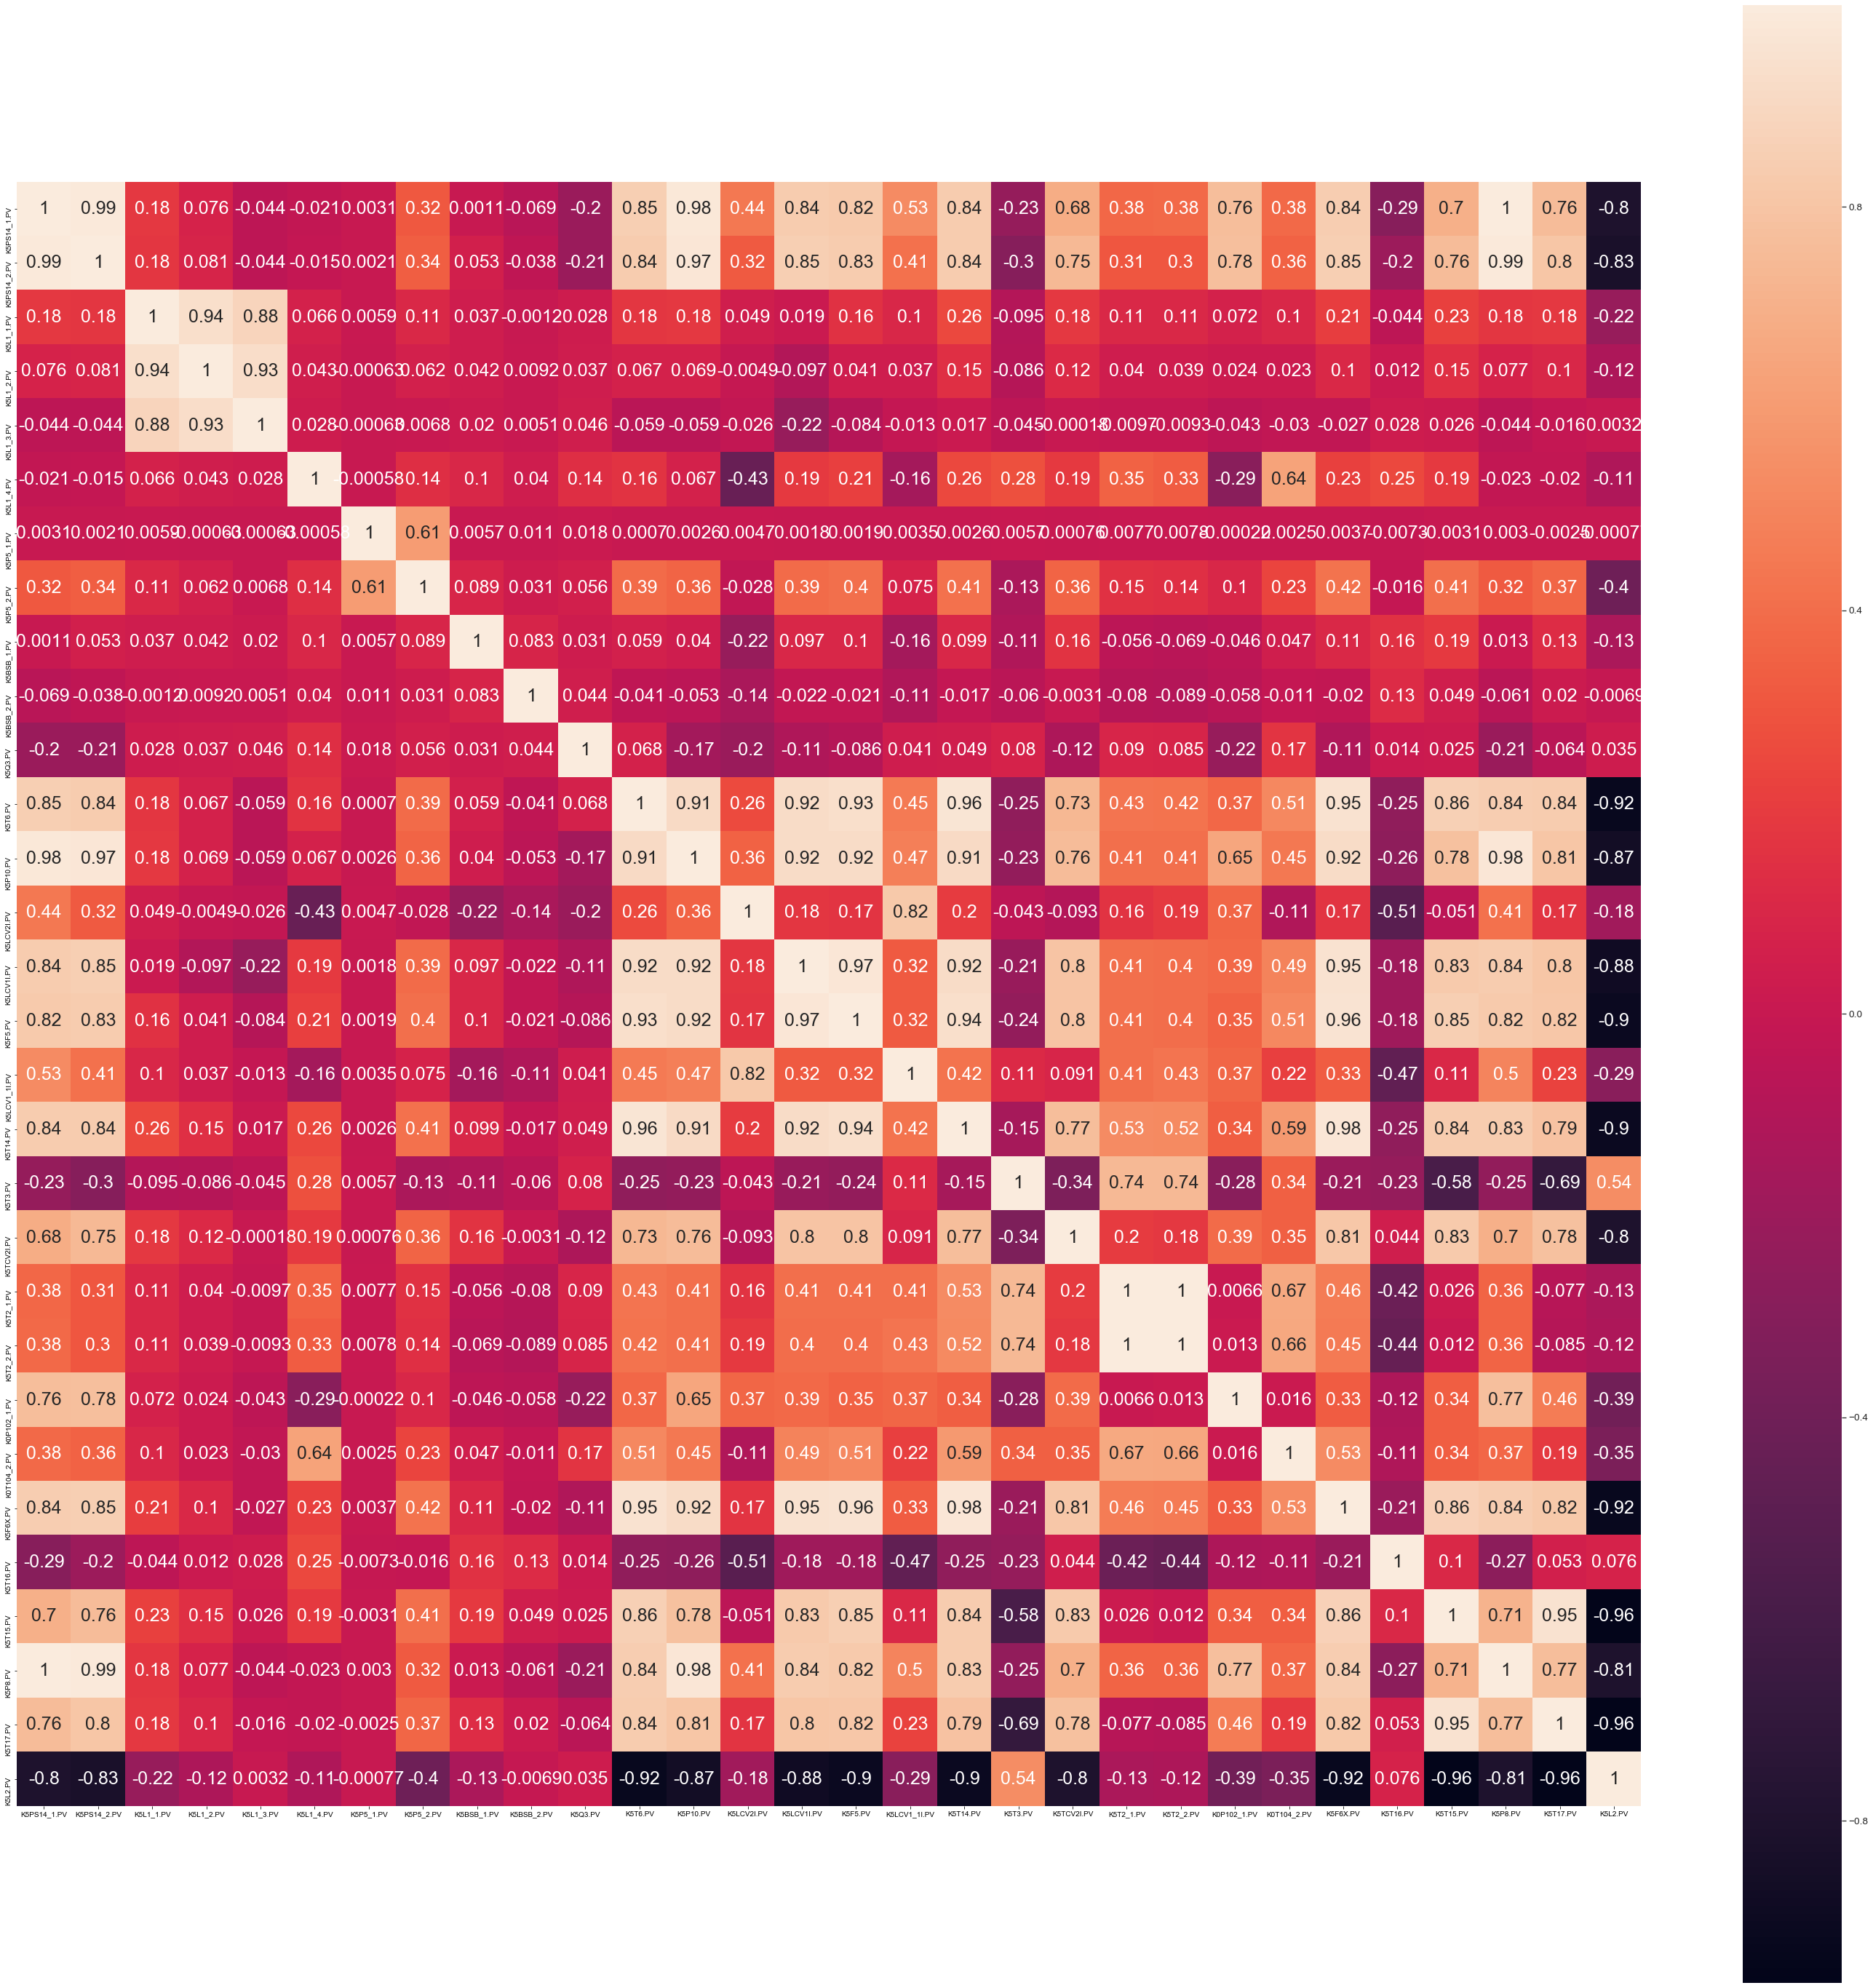

In [3]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [4]:
df = pd.read_csv('..\Initial_data\K5T2_1\K5T2_1.csv', ";")
df

,K5T3.PV,K5T2_1.PV
0,199.9775,425.3587
1,200.4375,425.3400
2,200.2525,425.3287
3,200.6800,425.2762
4,199.7513,425.2594
5,200.5187,425.1844
6,199.5825,425.1600
7,200.5100,425.0663
8,199.1337,425.0325
9,200.7962,424.9425


In [5]:
df=df.dropna()
df=df.round(4)
df=df.drop_duplicates(["K5T3.PV"])
df=df.drop_duplicates(["K5T2_1.PV"])
df

,K5T3.PV,K5T2_1.PV
0,199.9775,425.3587
1,200.4375,425.3400
2,200.2525,425.3287
3,200.6800,425.2762
4,199.7513,425.2594
5,200.5187,425.1844
6,199.5825,425.1600
7,200.5100,425.0663
8,199.1337,425.0325
9,200.7962,424.9425


In [8]:
y = df.drop(['K5T3.PV'], axis=1)
x = df.drop(['K5T2_1.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(180, 210, 100)[:, np.newaxis] # Точки для предсказания

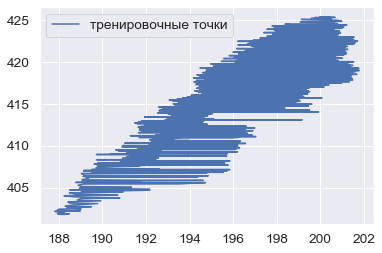

In [7]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

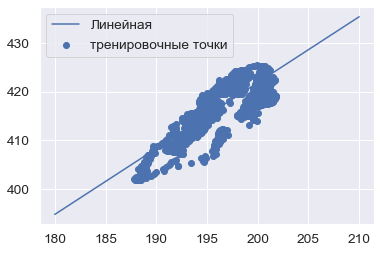

array([0.67857386, 0.66290344])

In [9]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=2)

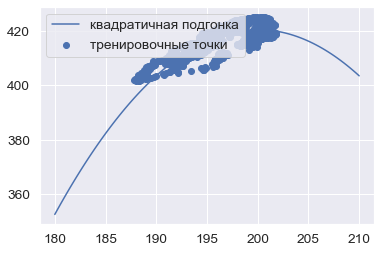

array([0.67857386, 0.66290344])

In [10]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

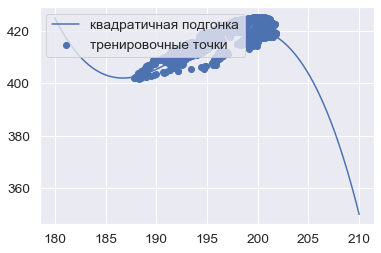

array([0.67857386, 0.66290344])

In [11]:
pr_3 = LinearRegression()
cube = PolynomialFeatures(degree=3)
X_cub = cube.fit_transform(X_train)   
pr_3.fit(X_cub, y_train)
y_pr = pr_3.predict(cube.fit_transform(task))
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_3, X_test, y_test, cv=2)

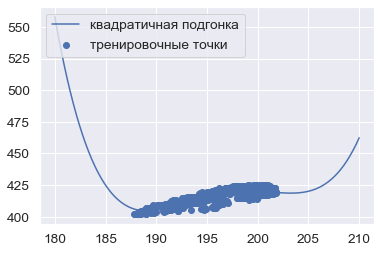

array([0.67857386, 0.66290344])

In [12]:
pr_4 = LinearRegression()
Fig = PolynomialFeatures(degree=4)
X_15 = Fig.fit_transform(X_train)   
pr_4.fit(X_15, y_train)
y_pr_4 = pr_4.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_4, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_4, X_test, y_test, cv=2)

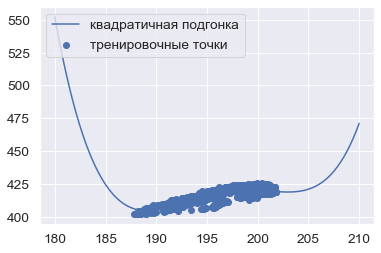

array([0.67857386, 0.66290344])

In [13]:
pr_5 = LinearRegression()
Fig = PolynomialFeatures(degree=5)
X_5 = Fig.fit_transform(X_train)   
pr_5.fit(X_5, y_train)
y_pr_5 = pr_5.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_5, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_5, X_test, y_test, cv=2)

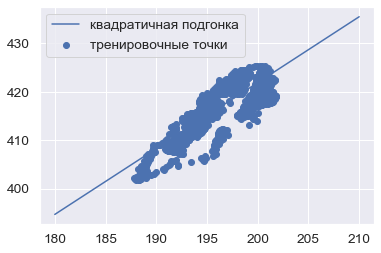

0.6741257936541298

In [14]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(X_test, y_test)

In [18]:
import pickle
filename = '../model/K5T2_1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [19]:
loaded_model = pickle.load(open("../model/K5T2_1.sav", 'rb'))

In [20]:
task2 = {'K5T3.PV':[200]}
df2 = pd.DataFrame(data=task2)
df2

,K5T3.PV
0,200


In [21]:
loaded_model.predict(df2)

array([[421.87246162]])